In [210]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
from sklearn.cluster import DBSCAN

# Problem Statement

---



 * Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df


# DataFrame

---



In [211]:
df=pd.read_csv("/content/wine.csv")
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Exploratory Data Analysis

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [213]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [214]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [215]:
df.duplicated().sum()

0

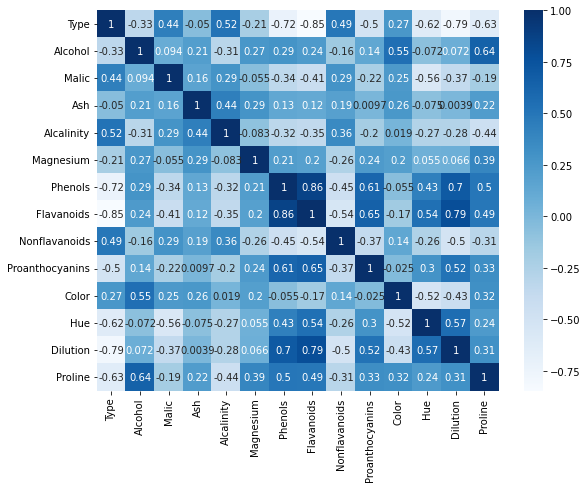

In [216]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')
plt.show()

In [217]:
for col in df:
    print(f'{col}: {df[col].unique()}')

Type: [1 2 3]
Alcohol: [14.23 13.2  13.16 14.37 13.24 14.2  14.39 14.06 14.83 13.86 14.1  14.12
 13.75 14.75 14.38 13.63 14.3  13.83 14.19 13.64 12.93 13.71 12.85 13.5
 13.05 13.39 13.3  13.87 14.02 13.73 13.58 13.68 13.76 13.51 13.48 13.28
 13.07 14.22 13.56 13.41 13.88 14.21 13.9  13.94 13.82 13.77 13.74 13.29
 13.72 12.37 12.33 12.64 13.67 12.17 13.11 13.34 12.21 12.29 13.49 12.99
 11.96 11.66 13.03 11.84 12.7  12.   12.72 12.08 12.67 12.16 11.65 11.64
 12.69 11.62 12.47 11.81 12.6  12.34 11.82 12.51 12.42 12.25 12.22 11.61
 11.46 12.52 11.76 11.41 11.03 12.77 11.45 11.56 11.87 12.07 12.43 11.79
 12.04 12.86 12.88 12.81 12.53 12.84 13.36 13.52 13.62 12.87 13.32 13.08
 12.79 13.23 12.58 13.17 13.84 12.45 14.34 12.36 13.69 12.96 13.78 13.45
 12.82 13.4  12.2  14.16 13.27 14.13]
Malic: [1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 2.16 1.48 1.73 1.81
 1.92 1.57 1.59 3.1  1.63 3.8  1.86 1.6  2.05 1.77 1.72 1.9  1.68 1.5
 1.66 1.83 1.53 1.8  1.65 3.99 3.84 1.89 3.98 4.04 3.59 2.02 1

# Principle Components Analysis

In [218]:
df1 = df.iloc[:, 1:]

In [219]:
df2=df1.values
df2

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [220]:
# Normalizing the numerical data 
df2_normal=scale(df2)

In [221]:
df2_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [222]:
pca= PCA()
pca_values= pca.fit_transform(df2_normal)
#pca_values

In [223]:
## The amount of variance that each PCA explains is 
var=np.round(pca.explained_variance_ratio_,decimals=4)*100
var

array([36.2 , 19.21, 11.12,  7.07,  6.56,  4.94,  4.24,  2.68,  2.22,
        1.93,  1.74,  1.3 ,  0.8 ])

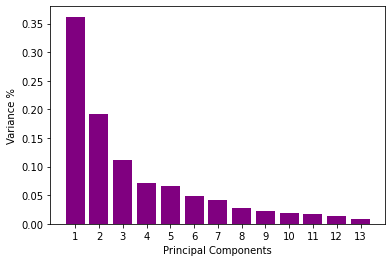

In [224]:
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='purple')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)
plt.show()

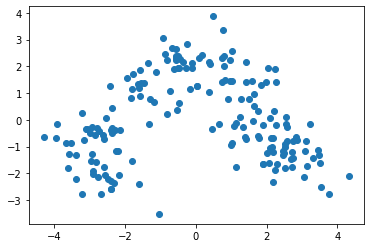

In [225]:
# plot between PCA1 and PCA2 
x = pca_values[:,0:1]
y = pca_values[:,1:2]
plt.scatter(x,y)

> we will select 2 principle components in our analysis

In [226]:
pca_df = pd.DataFrame(pca_values)
pca_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866


In [227]:
pca_df=pca_df.iloc[:,:2]

# Heirarchical Clustering

In [228]:
pca_df1=pca_df.copy()

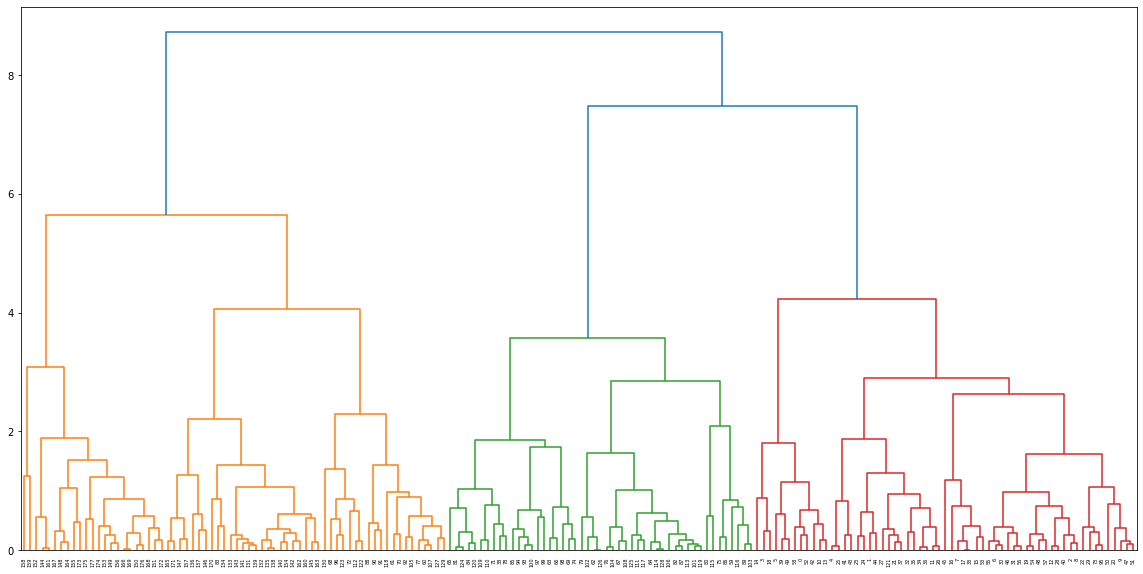

In [229]:
# create dendrogram
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(pca_df1, method='complete'))

In [230]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')

In [231]:
hc.fit(pca_df1)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [232]:
# save clusters for chart
y_hc = hc.fit_predict(pca_df1)

In [233]:
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [234]:
pca_df1['cluster_id'] = y_hc+1

In [235]:
pca_df1

,0,1,cluster_id
0,3.316751,-1.443463,2
1,2.209465,0.333393,2
2,2.516740,-1.031151,2
3,3.757066,-2.756372,2
4,1.008908,-0.869831,2
...,...,...,...
173,-3.370524,-2.216289,1
174,-2.601956,-1.757229,1
175,-2.677839,-2.760899,1
176,-2.387017,-2.297347,1


# K-Means Clustering

In [236]:
pca_df2=pca_df.copy()

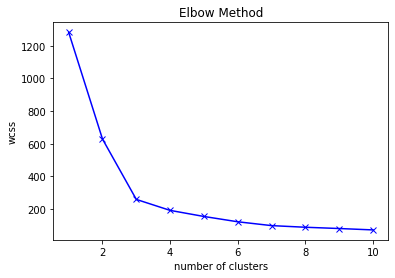

In [237]:
wcss =[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(pca_df2)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss, 'bx-')
plt.title("Elbow Method")
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

* The scree plot levels off at k=3 and let's use it to determine the clusters.

In [238]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(pca_df2)

KMeans(n_clusters=3, random_state=42)

In [239]:
clusters_new.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [240]:
kmeans.inertia_

72.9410137517236

In [241]:
#Assign clusters to the data set
pca_df2['kmeans_cluster_id'] = clusters_new.labels_

In [242]:
pca_df2.groupby('kmeans_cluster_id').agg(['mean']).reset_index()

,kmeans_cluster_id,0,1
,,mean,mean
0,0,-2.743930,-1.214191
1,1,2.266150,-0.865592
2,2,-0.162785,1.767588


In [243]:
pca_df2.head()

,0,1,kmeans_cluster_id
0,3.316751,-1.443463,1
1,2.209465,0.333393,1
2,2.516740,-1.031151,1
3,3.757066,-2.756372,1
4,1.008908,-0.869831,1


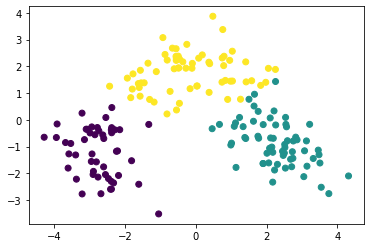

In [244]:
plt.scatter(pca_df2[0], pca_df2[1], c=clusters_new.labels_)
plt.show()

# DB-Scan

In [245]:
pca_df3=pca_df.copy()

In [246]:
dbscan = DBSCAN(eps=5, min_samples=4)
dbscan.fit(pca_df3)

DBSCAN(eps=5, min_samples=4)

In [247]:
#Noicy samples are given the label -1
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [248]:
#assign clusters to the dataset
pca_df3["DB_cluster_id"] = dbscan.labels_
pca_df3.head()

,0,1,DB_cluster_id
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0


In [249]:
round(pca_df3.mean(),4)

0                0.0
1                0.0
DB_cluster_id    0.0
dtype: float64

# Conclusion -
  * Here,we have obtained 2 components from 13 components and selected 2 components explained 56% of variation of the dataset.
  * Here, we can see that there exist 3 clusters in the dataset.
